<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# 1- General informations about the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [18]:
# Descriptive statistics for the dataframe
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
# Informations about the dataframe 
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [10]:
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

There are no null values in the dataframe.

In [11]:
boston_df.duplicated().sum()

0

There are no duplicates in the dataframe.

In [14]:
# Correlation between columns
boston_df.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


# 2- Generate Descriptive Statistics and Visualizations

In [17]:
import matplotlib.pyplot as plt 

## 2.1- Boxplot for the "Median value of owner-occupied homes"

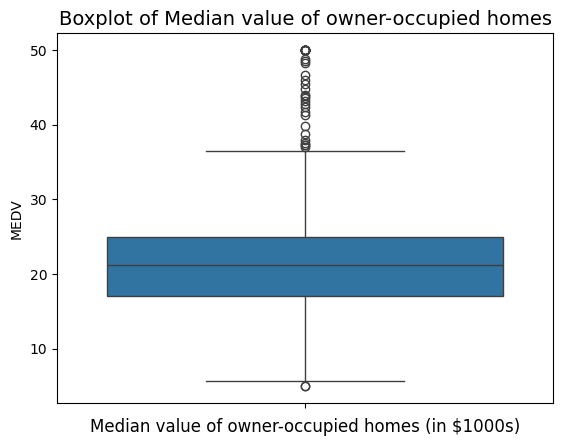

In [24]:
# Create the boxplot
sns.boxplot(y='MEDV', data=boston_df)

# Add labels and a title
plt.xlabel('Median value of owner-occupied homes (in $1000s)', fontsize=12)
plt.title('Boxplot of Median value of owner-occupied homes', fontsize=14)

# Customize the ticks on the x-axis
#plt.xticks(fontsize=12)

# Show the plot
plt.show()

## 2.2- Bar plot for the Charles river variable

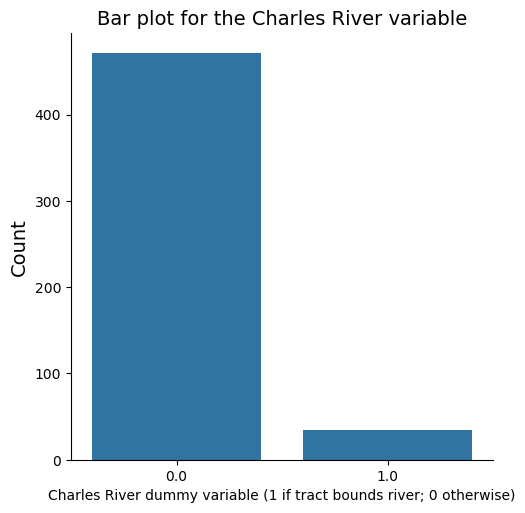

In [28]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River dummy variable (1 if tract bounds river; 0 otherwise)", fontsize=10)
plt.ylabel("Count", fontsize=14)
plt.title("Bar plot for the Charles River variable", fontsize=14)
plt.show()

The proportion of tracts bordering the river (CHAS=1) is very small.

## 2.3- Boxplot for the MEDV variable vs the AGE variable

N.B : Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

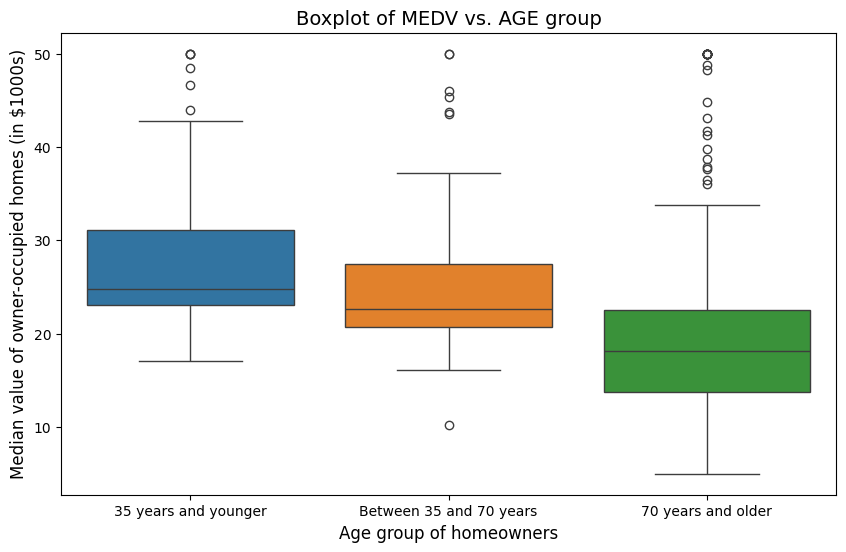

In [33]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, hue = 'AGE_group')

# Add labels and title
plt.xlabel('Age group of homeowners', fontsize=12)
plt.ylabel('Median value of owner-occupied homes (in $1000s)', fontsize=12)
plt.title('Boxplot of MEDV vs. AGE group', fontsize=14)

# Show the plot
plt.show()

The median age of homeowners aged 35 and less is higher than that of those aged between 35 and 70, which is itself higher than the median age of those over 70.

## 2.4- Scatter plot to show the relationship between NOX and INDUS

Recall

· INDUS - proportion of non-retail business acres per town.

· NOX - nitric oxides concentration (parts per 10 million)

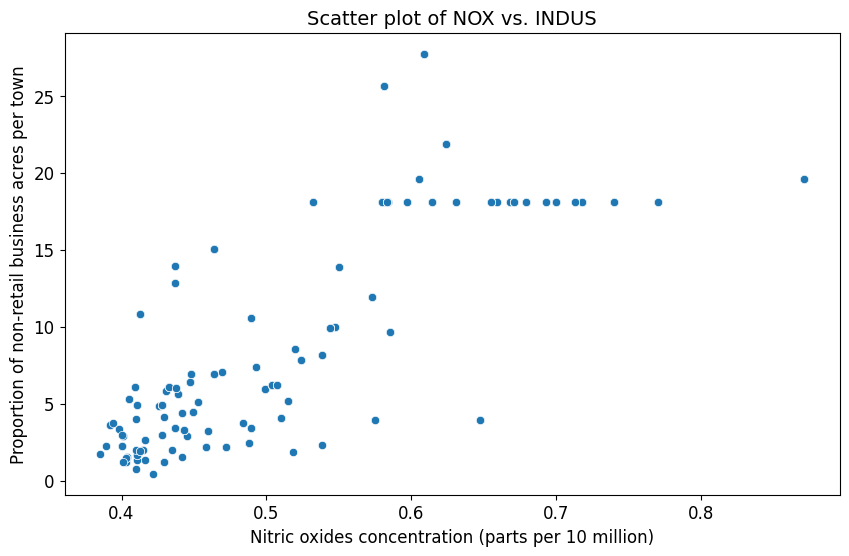

In [38]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

# Add labels and a title
plt.xlabel('Nitric oxides concentration (parts per 10 million)', fontsize=12)
plt.ylabel('Proportion of non-retail business acres per town', fontsize=12)
plt.title('Scatter plot of NOX vs. INDUS', fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

As the nitric oxides concentration (NOX) increases, the proportion of non-retail business acres per town (INDUS) also increases. So the scatter plot suggests a positive relationship between the NOX and the INDUS.

## 2.4- Histogram for the pupil to teacher ratio variable

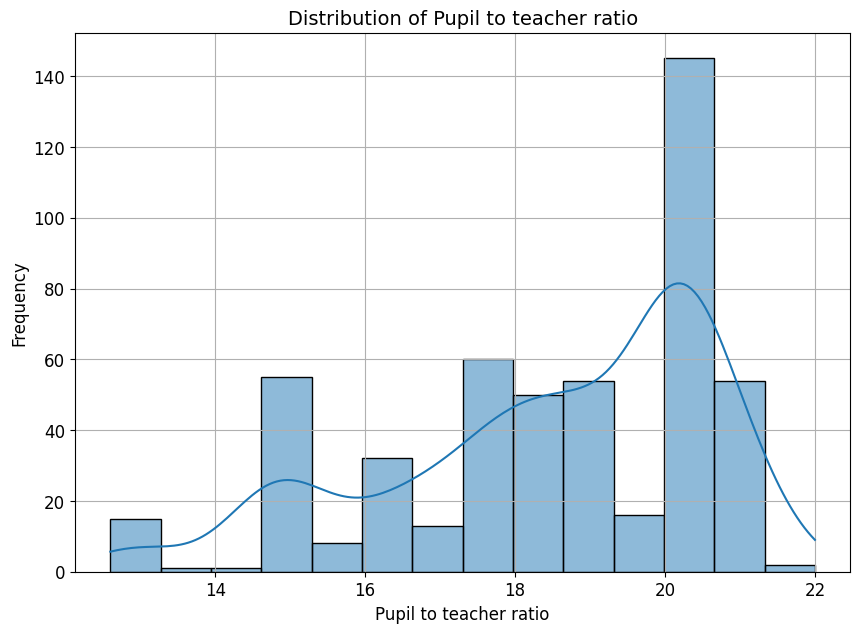

In [40]:
# Create the histogram with KDE
plt.figure(figsize=(10, 7))
ax = sns.histplot(boston_df['PTRATIO'], bins='auto', kde=True)

# Add labels and a title
plt.xlabel('Pupil to teacher ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Pupil to teacher ratio', fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid
plt.grid(True)

# Show the plot
plt.show()

# 3- Use the appropriate tests to answer the questions provided

## 3.1- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")

In [42]:
# Levene test to assess variance equality
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

P-value < 0.05 : variances are not equal. Therefore we proceed with t-test with 'equal_var=False'.

In [44]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Conclusion : p-value = 0.003567 < 0.05 so we reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the river.

## 3.2- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

First, we group the data into 3 ages groups.

*   35 years and younger
*   between 35 and 70 years
*   70 years and older

In [45]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (The three population medians are equal)
*   $H\_1:$ At least one of the medians differ

Test for equality of variance

In [46]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value > 0.05, the variances are equal.

In [47]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion : p-value = 1.71e-15 < 0.05 so we reject the null hypothesis of equal medians as there is significant evidence that at least one of the medians differ.

## 3.3- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [49]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion : p-value < 0.05 so we reject the null hypothesis. With a Pearson correlation coefficient of 0.764 and a very small p-value (close to zero), we conclude that there is a strong positive linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

## 3.4- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis

*   $H\_0: β\_1 = 0$ There is no effect of the weighted distance to the employment centers on the median value of owner-occupied homes.
*   $H\_1: β\_1 ≠ 0$ There is an effect of the weighted distance to the employment centers on the median value of owner-occupied homes.

In [50]:
# Prepare the data
X = boston_df['DIS']  # Independent variable (DIS)
y = boston_df['MEDV']  # Dependent variable (MEDV)

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        23:14:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion : p-value is less than 0.05, so we reject the null hypothesis. Therefore, there is a significant linear relationship between the weighted distance to the employment centers (DIS) and the median value of owner-occupied homes (MEDV).

## Author

[Igor Ngouagnia](https://www.linkedin.com/in/igor-boris-ngouagnia-yemeli-860a4b1b4/)
<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2025-08-25        | 1.0     | Igor Ngouagnia  | Converted initial version to Jupyterlite|
-->

<hr>